<a href="https://colab.research.google.com/github/snandhakishor/Weather-and-climate-analytics/blob/main/weatheranalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"/content/Weather-and-climate-analytics/data/cleaned_weatherdata.csv")
df['time'] = pd.to_datetime(df['time'])


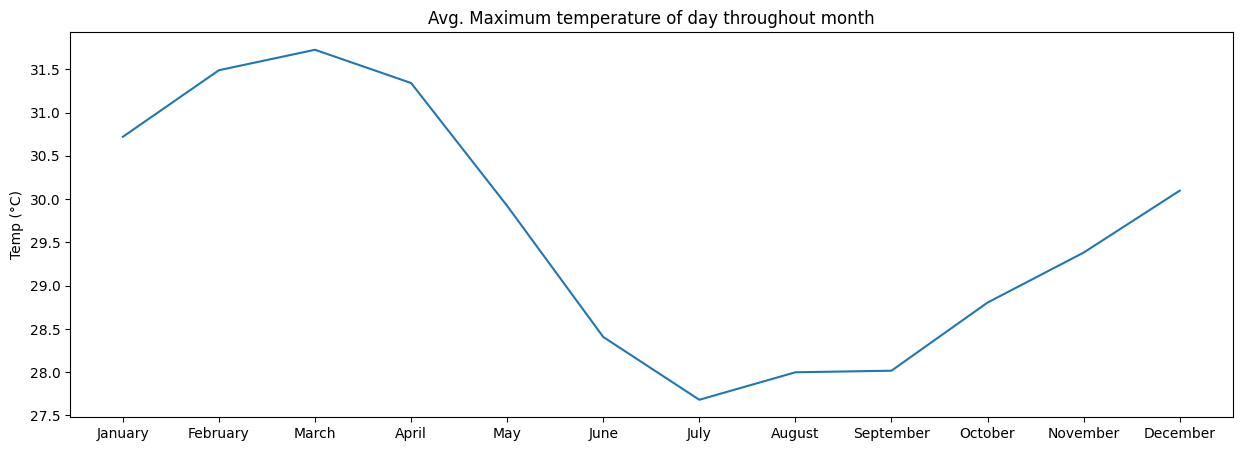

In [22]:
# date vs max temp plot
df['month'] = df['time'].dt.month_name()
df['month_no'] = df['time'].dt.month
# monthly average temperature table
monthly_temp = df.groupby(['month', 'month_no'], as_index=False).agg(avg_temp = ('temperature_2m_max', 'mean'))
monthly_temp = monthly_temp.sort_values('month_no')
monthly_temp
plt.figure(figsize=(15, 5))
plt.plot(monthly_temp['month'], monthly_temp['avg_temp'])
plt.title('Avg. Maximum temperature of day throughout month')
plt.ylabel('Temp (°C)')
plt.show()

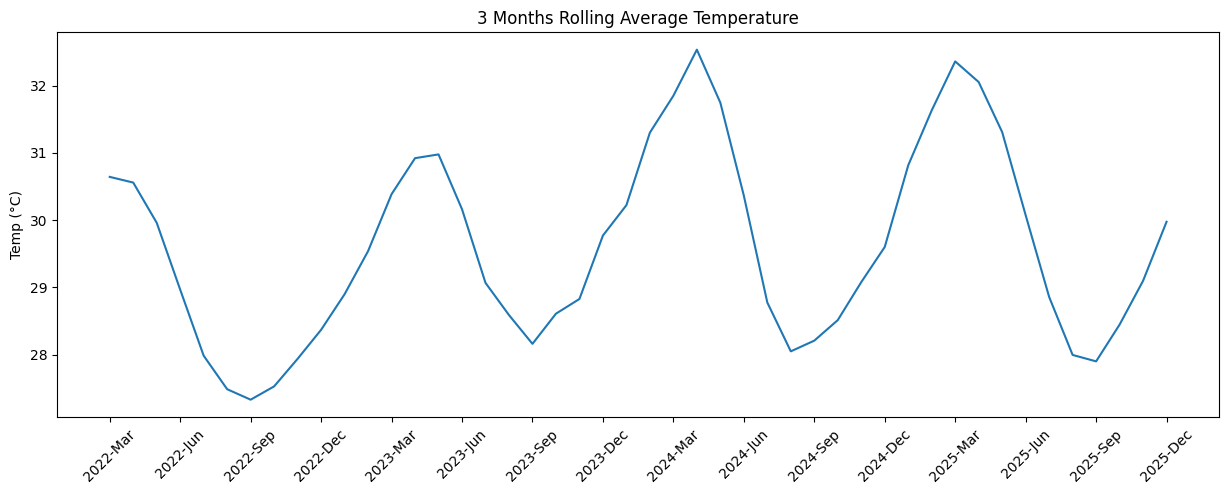

In [23]:
# rolling average 3 months window
df['year-month'] = df['time'].dt.strftime("%Y-%b")
df['year'] = df['time'].dt.year
temp_ym = df.groupby(['year','year-month','month_no', 'month'], as_index=False).agg(avg_temp = ('temperature_2m_max', 'mean'))
temp_ym = temp_ym.sort_values(['year', 'month_no'])
temp_ym['rolling_avg_temp'] = temp_ym['avg_temp'].rolling(window = 3).mean()
temp_ym.dropna(inplace=True)


# plotting
plt.figure(figsize=(15,5))
plt.plot(temp_ym['year-month'], temp_ym['rolling_avg_temp'])
plt.xticks(ticks=temp_ym['year-month'][::3], rotation = 45)
plt.title('3 Months Rolling Average Temperature')
plt.ylabel('Temp (°C)')
plt.show()

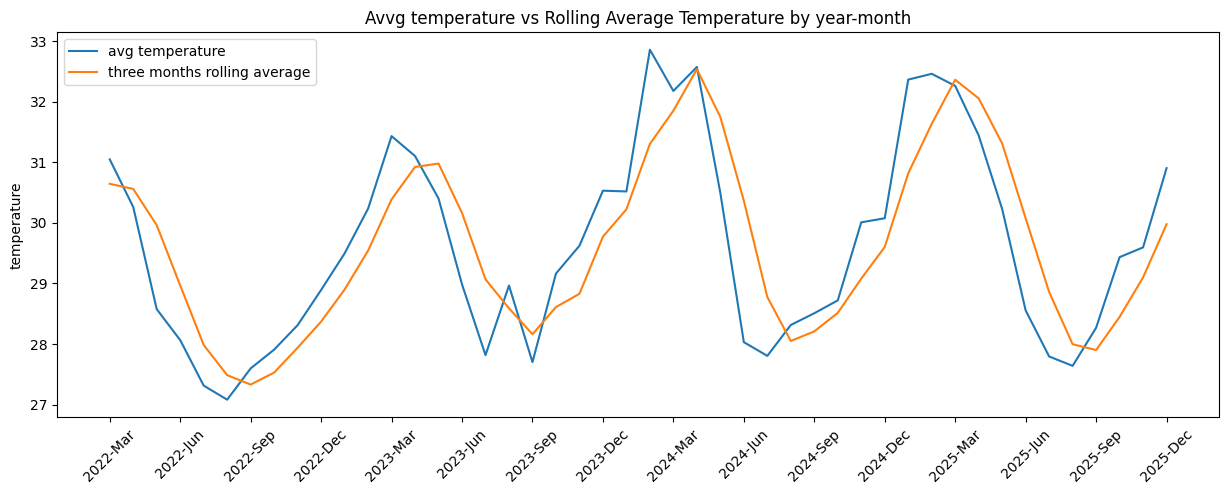

In [33]:
# comparing both rolling average and average temperature to see if the rolling average has smoothened
plt.figure(figsize=[15,5])
plt.plot(temp_ym['year-month'], temp_ym['avg_temp'], label = "avg temperature")
plt.plot(temp_ym['year-month'], temp_ym['rolling_avg_temp'], label = "three months rolling average")
plt.legend()
plt.xticks(temp_ym['year-month'][::3], rotation = 45)
plt.title('Avvg temperature vs Rolling Average Temperature by year-month')
plt.ylabel('temperature')
plt.show()

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
